# Data Inspection and Subsetting with GapMinder

## A First Dive

* We are all going to **start with an new, empty notebook**, and create and edit cells by **typing the appropriate code or text** (avoiding copy-and-pasting).

* It is absolutely fine, and expected, that you won't understand all of the code involved. For the moment, let us think more broadly about the goal of each cell; later, and iteratively, we will revisit the code and unpack things.

* Firstly, we should import some essential modules for manipulating and visualising datasets; also, do some very basic configuration of the visualisation engine running behind the scenes.

### Preamble: Importing and Configuring Essential Packages

This will naturally look cryptic to most - the key points to take away are:

* the essential modules for data visualisation: `matplotlib`, `seaborn`
* ...and for data manipulation: `pandas`, `numpy`
* ...and for machine learning: `scikit-learn`
* `sns.set` sets up the visualisation engine (e.g., default size of figures)
* the `%` *magic* statements tell Jupyter Lab to place output plots in the notebook itself and to use higher resolution if possible.

In [40]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (8, 6) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_formats = set(('retina', 'svg'))

### The (Simplified) GapMinder Dataset

* We will make use of the simplified `gapminder` dataset, which concerns records of population, life expectancy, and GDP of countries spanning some 50 years. The dataset can be downloaded from [here](https://github.com/jennybc/gapminder/blob/master/inst/extdata/gapminder.tsv).
    - Have a look at the dataset rendered at the GitHub link and browse its structure and content for a quick understanding of the data.

* It is a tab-separated value (`.tsv`) text file. One is able to see it raw [here](https://github.com/jennybc/gapminder/blob/master/inst/extdata/gapminder.tsv?raw=True).

* For more on `gapminder`, you might want to check some of [Hans Rosling's TED talks](https://www.ted.com/playlists/474/the_best_hans_rosling_talks_yo) or the book [Factfulness: Ten Reasons We're Wrong About the World--and Why Things Are Better Than You Think](https://g.co/kgs/bEBSWN).

* I have added the dataset to my GitHub for convenience.

* We will ask `pandas` to read the data file and instantiate a **DataFrame** object, which we assign to the variable named `gm` for later reference.

* The URL to the data file, provided as an **argument** to `.read_csv`, should be enclosed by a pair of single quotes (you might want to copy the link to the raw data from a previous slide).

* `sep=\t` indicates that the data is tab-separated (rather the comma-separated).

In [41]:
gm = pd.read_csv(
    'https://raw.githubusercontent.com/gerberl/6G7V0026-2223/main/datasets/gapminder.tsv',
    sep='\t'
)

In [42]:
# Let us inspect the data by, say, just take a few of the top rows.
gm.head(5)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


What follows are some variations on getting familiar with the data with some simple inspection that relies on DataFrame **methods**.

In [43]:
gm.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [44]:
gm.sample()

,country,continent,year,lifeExp,pop,gdpPercap
1069,Nepal,Asia,1957,37.686,9682338,597.936356


In [45]:
gm.sample(5)

,country,continent,year,lifeExp,pop,gdpPercap
249,Canada,Americas,1997,78.610,30305843,28954.925890
1300,Sao Tome and Principe,Africa,1972,56.480,76595,1532.985254
899,Liberia,Africa,2007,45.678,3193942,414.507341
395,Cuba,Americas,2007,78.273,11416987,8948.102923
347,"Congo, Rep.",Africa,2007,55.322,3800610,3632.557798


In [46]:
gm.tail(12)

,country,continent,year,lifeExp,pop,gdpPercap
1692,Zimbabwe,Africa,1952,48.451,3080907,406.884115
1693,Zimbabwe,Africa,1957,50.469,3646340,518.764268
1694,Zimbabwe,Africa,1962,52.358,4277736,527.272182
1695,Zimbabwe,Africa,1967,53.995,4995432,569.795071
1696,Zimbabwe,Africa,1972,55.635,5861135,799.362176
1697,Zimbabwe,Africa,1977,57.674,6642107,685.587682
1698,Zimbabwe,Africa,1982,60.363,7636524,788.855041
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960


**checkpoint**: say we would like to inspect the first 20 rows, and sample at least 10 observations from the dataset. Please write the corresponding code.

### A Data Science Question

* How does the data distribution of life expectancy varies over the \~50 years of observations? Are there any clear trends or patterns? Anything unusual about the data?

In [47]:
# Could we obtain which years have observations been recorded for?
gm['year'].value_counts()

# What does the output tell us?

1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
Name: year, dtype: int64

* A series of boxplots on `Life Expectancy`, one for each `Year`, could tell us something about our original question?

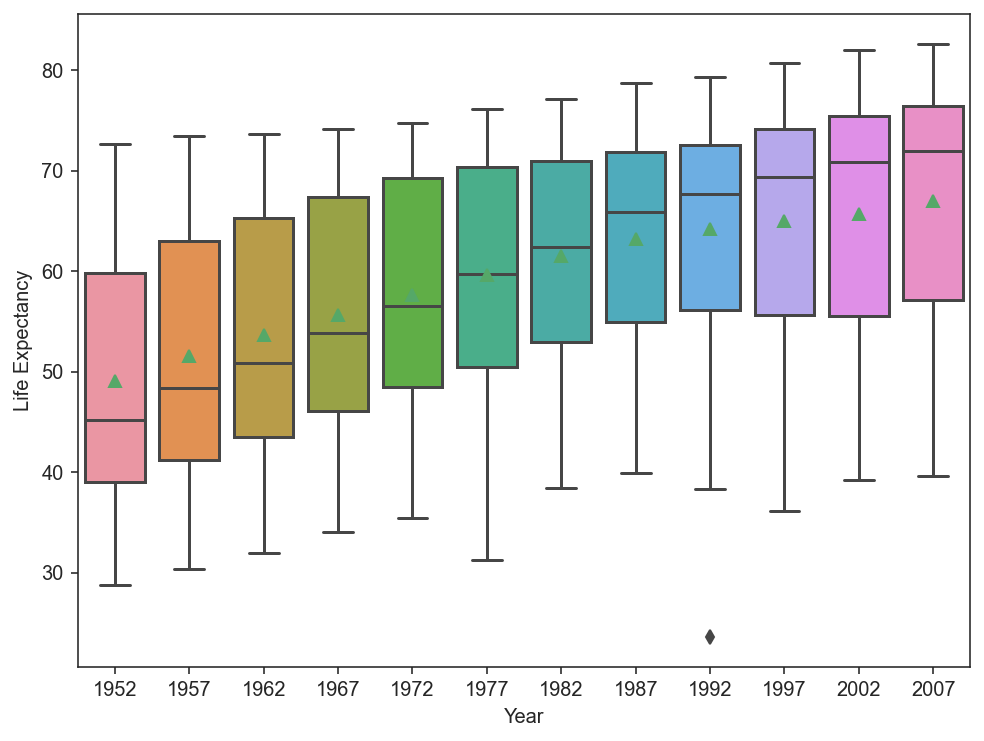

In [48]:
ax = sns.boxplot(x='year', y='lifeExp', showmeans=True, data=gm)
ax.set_ylabel('Life Expectancy')
ax.set_xlabel('Year');

### Reflection and Exercises

* In a new text cell (below the chart, I'd suggest) discuss what are your findings. Would you have an explanation as to why sometimes the mean is above the median but, other times, below?

* We have used `.head()` to inspect the initial rows of the dataset for a quick inspection. Similarly, now, add a cell for producing a random sample of 5 rows (tip: `.sample()`) and another for looking into the last 12 rows (tip: `.tail()`).

## A Second, Deeper Dive

### Subsetting DataFrames by Specifying Row and Column Labels

**Dataframes** are **objects** that can be seen as tabular structures with **rows** and **columns**. Rows and columns are associated with **indices**, and indices contain **labels**. One can think of each label being a name of a column (i.e., a header) or of a row (i.e., a row number). 

Accessing individual rows and columns is achieved via the operator `[]` or the property `.loc[]`.

In many scenarios, the application of a method such as `.head()` or `.loc[]` on a DataFrame returns a new DataFrame object (or view of an object, but let us not worry about this right now).

In [49]:
gm['year'].head()

0    1952
1    1957
2    1962
3    1967
4    1972
Name: year, dtype: int64

In [50]:
gm.head()['year']

0    1952
1    1957
2    1962
3    1967
4    1972
Name: year, dtype: int64

In [51]:
gm.loc[0]

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object

In [52]:
gm.loc[0, 'lifeExp']

28.801

In [53]:
gm.loc[0]['lifeExp']

28.801

Instead of using a single row or column label, one can provide **a list** of labels.

In [54]:
gm.loc[ [0,12,24] ]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
12,Albania,Europe,1952,55.230,1282697,1601.056136
24,Algeria,Africa,1952,43.077,9279525,2449.008185


In [55]:
gm[ ['country', 'year', 'lifeExp'] ]

,country,year,lifeExp
0,Afghanistan,1952,28.801
1,Afghanistan,1957,30.332
2,Afghanistan,1962,31.997
3,Afghanistan,1967,34.020
4,Afghanistan,1972,36.088
...,...,...,...
1699,Zimbabwe,1987,62.351
1700,Zimbabwe,1992,60.377
1701,Zimbabwe,1997,46.809
1702,Zimbabwe,2002,39.989


In [56]:
gm.loc[ [0,12,24], ['country', 'year', 'lifeExp'] ]

,country,year,lifeExp
0,Afghanistan,1952,28.801
12,Albania,1952,55.230
24,Algeria,1952,43.077


The following are not quite equivalent - we shouldn't worry too much about the distinction at this stage. But we should say that one returns a two-dimensional DataFrame and the other a uni-dimensional DataFrame (referred to as a `pandas` **Series**), if you'd like.

In [57]:
gm.loc[ [0] ]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314


In [58]:
gm.loc[0]

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object

**checkpoint**: it is a good idea to practice some of the above. You could write code cells that do the following:

* produce a DataFrame with only the columns `year` and `pop`. For conciseness, you can simply take the `.head()` of the result.
* obtain a DataFrame with the rows with labels `10`, `20`, `100`, and `1000` - for no particular reason, rather than just trying out subsetting expressions.
* finally, a DataFrame for the subset of columns and rows expressed above.

By the way, one could also use **ranges of labels**, rather than listing every single one were are interesting in:

In [59]:
gm.loc[0:5]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360


In [60]:
gm.loc[0:5, 'lifeExp':'gdpPercap']

,lifeExp,pop,gdpPercap
0,28.801,8425333,779.445314
1,30.332,9240934,820.853030
2,31.997,10267083,853.100710
3,34.020,11537966,836.197138
4,36.088,13079460,739.981106
5,38.438,14880372,786.113360


One can omit the being and/or the end of the range:

In [61]:
gm.loc[1700:]

,country,continent,year,lifeExp,pop,gdpPercap
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [62]:
gm.loc[1700:, 'lifeExp':]

,lifeExp,pop,gdpPercap
1700,60.377,10704340,693.420786
1701,46.809,11404948,792.449960
1702,39.989,11926563,672.038623
1703,43.487,12311143,469.709298


In [63]:
gm.loc[:, 'lifeExp':]

,lifeExp,pop,gdpPercap
0,28.801,8425333,779.445314
1,30.332,9240934,820.853030
2,31.997,10267083,853.100710
3,34.020,11537966,836.197138
4,36.088,13079460,739.981106
...,...,...,...
1699,62.351,9216418,706.157306
1700,60.377,10704340,693.420786
1701,46.809,11404948,792.449960
1702,39.989,11926563,672.038623


**checkpoint**: perhaps you would like to play with code on ranges above and try some alternatives?

### Subsetting DataFrames with Logical Conditions

If I am interested in only those latest observations dated of 2007...

One of the options is to use the method `.query()` - it can be more intuitive than our second option, but more limited, perhaps.

In [64]:
gm.query("year==2007").head()

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


Quite commonly, Python data scientists will use **boolean masks** (in other words, vectors of True/False values). I am only using `.head()` to supress the output of too many rows - this is typical strategy in inspecting data and expressions.

In [65]:
gm.loc[ gm['year']==2007 ].head()

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


In [66]:
gm['year']==2007

0       False
1       False
2       False
3       False
4       False
        ...  
1699    False
1700    False
1701    False
1702    False
1703     True
Name: year, Length: 1704, dtype: bool

How about which countries have had life expectancy equals to or greater than 80 years?

In [67]:
gm.loc[ gm['lifeExp']>=80  ]

,country,continent,year,lifeExp,pop,gdpPercap
70,Australia,Oceania,2002,80.370,19546792,30687.75473
71,Australia,Oceania,2007,81.235,20434176,34435.36744
251,Canada,Americas,2007,80.653,33390141,36319.23501
539,France,Europe,2007,80.657,61083916,30470.01670
669,"Hong Kong, China",Asia,1997,80.000,6495918,28377.63219
670,"Hong Kong, China",Asia,2002,81.495,6762476,30209.01516
671,"Hong Kong, China",Asia,2007,82.208,6980412,39724.97867
694,Iceland,Europe,2002,80.500,288030,31163.20196
695,Iceland,Europe,2007,81.757,301931,36180.78919
767,Israel,Asia,2007,80.745,6426679,25523.27710


OK, some countries appear more than once. Can I get a quick list of unique country names? Yes, I can. It is worth emphasising that can **chain** DataFrame-producing statements, creating pipelines. The output of one method becomes the input of another.

In [68]:
gm.loc[ gm['lifeExp']>=80 ]['country'].drop_duplicates()

70             Australia
251               Canada
539               France
669     Hong Kong, China
694              Iceland
767               Israel
778                Italy
801                Japan
1103         New Zealand
1151              Norway
1427               Spain
1474              Sweden
1486         Switzerland
Name: country, dtype: object

Confusing? You can split a single statement into several lines, by assigning intermediate results to variables.

In [69]:
# the subset of data for life expectancy equal to or greater than 80 years
gm_gte80 = gm.loc[ gm['lifeExp']>=80 ]
gm_gte80_country = gm_gte80[['country']]
gm_gte80_country.drop_duplicates()

,country
70,Australia
251,Canada
539,France
669,"Hong Kong, China"
694,Iceland
767,Israel
778,Italy
801,Japan
1103,New Zealand
1151,Norway


**checkpoint**: could you write Code cells for retrieving the following subsets of data?

* all the observations in 1952.
* all those that have a GDP-per-capita greater than US$30K.
* are there any instances where life expectancy was lower than 30 years?

### DataFrame Shape

In [70]:
gm.shape

(1704, 6)

In [71]:
len(gm)

1704

In [72]:
gm.shape[0]

1704

In [73]:
gm.shape[1]

6

### Subsetting DataFrames: Multiple Conditions

You will need the brackets to make sure that the evaluation order is correct.

In [74]:
gm.loc[ (gm['year']==1952) & (gm['lifeExp']>70) ]

,country,continent,year,lifeExp,pop,gdpPercap
408,Denmark,Europe,1952,70.78,4334000,9692.385245
684,Iceland,Europe,1952,72.49,147962,7267.688428
1080,Netherlands,Europe,1952,72.13,10381988,8941.571858
1140,Norway,Europe,1952,72.67,3327728,10095.421720
1464,Sweden,Europe,1952,71.86,7124673,8527.844662


In [75]:
gm.loc[ (gm['year']==2007) & (gm['lifeExp']>70) ]

,country,continent,year,lifeExp,pop,gdpPercap
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
59,Argentina,Americas,2007,75.320,40301927,12779.379640
71,Australia,Oceania,2007,81.235,20434176,34435.367440
83,Austria,Europe,2007,79.829,8199783,36126.492700
...,...,...,...,...,...,...
1619,United States,Americas,2007,78.242,301139947,42951.653090
1631,Uruguay,Americas,2007,76.384,3447496,10611.462990
1643,Venezuela,Americas,2007,73.747,26084662,11415.805690
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404


Would you to like to know how many? `.shape` or `len` will help you here.

In [76]:
the_subset = gm.loc[ (gm['year']==1952) & (gm['lifeExp']>70) ]
len(the_subset)

5

In [77]:
the_subset = gm.loc[ (gm['year']==2007) & (gm['lifeExp']>70) ]
len(the_subset)

83

What is a suitable interpretaiton of these next two pieces of code?

In [78]:
gm.loc[ (gm['lifeExp']>=78) & (gm['lifeExp']>=80) ].head()

,country,continent,year,lifeExp,pop,gdpPercap
70,Australia,Oceania,2002,80.370,19546792,30687.75473
71,Australia,Oceania,2007,81.235,20434176,34435.36744
251,Canada,Americas,2007,80.653,33390141,36319.23501
539,France,Europe,2007,80.657,61083916,30470.01670
669,"Hong Kong, China",Asia,1997,80.000,6495918,28377.63219


In [79]:
gm.loc[ (gm['lifeExp']<30) | (gm['lifeExp']>81) ]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
71,Australia,Oceania,2007,81.235,20434176,34435.367440
670,"Hong Kong, China",Asia,2002,81.495,6762476,30209.015160
671,"Hong Kong, China",Asia,2007,82.208,6980412,39724.978670
695,Iceland,Europe,2007,81.757,301931,36180.789190
802,Japan,Asia,2002,82.000,127065841,28604.591900
803,Japan,Asia,2007,82.603,127467972,31656.068060
1292,Rwanda,Africa,1992,23.599,7290203,737.068595
1487,Switzerland,Europe,2007,81.701,7554661,37506.419070


### Sorting the Rows of a DataFrame

In [81]:
# inline documentation on a method? Use the exclamation mark
# gm.sort_values?

In [ ]:
gm_2007 = gm.loc[ gm['year']==2007 ]
gm_2007.sort_values(by='pop').head()

In [ ]:
gm_2007.sort_values(by='pop', ascending=False).head()

## Exercises

As a reminder, this is the DataFrame we are starting with:

In [ ]:
gm.head(1)

1. Select only the observations for the year of 1972.

2. For the resulting DataFrame of query above, how many data instances there are?

3. Obtain the rows for Brazil only.

4. What are the years for which observations have been recorded? (you might want to check what methods such as `.unique()` and `.value_counts()` can do for you here.

5. And how many different years?

6. What are top-10 countries in 2007 with with respect to life expectancy?

7. Obtain the subset of observations for Asia in 2007.

8. Produce the observations for South America for the period between 2000 and 2009.

9. Show life expectancy and GDP-per-capita for Brazil.

10. How many observations do we have for each continent?

11. What is the life expectancy for Brazil measured in 2007?